In [ ]:
# Libraries
import pandas as pd, numpy as np, seaborn as sn, matplotlib.pyplot as plt, ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics, preprocessing
from sklearn.metrics import  accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Function that takes a MScore and cast it into an integer value (0 means a low credit risk, 1 an high credit risk)
def MScore_to_int(x):
    return 0 if (str(x[0]).lower() in ['a', 'b']) else 1


# Function to print the overall performance metrics of a model
def print_performances(name, classifier, X_train, y_train, X_test, y_test):
    y_predict_train = classifier.predict(X_train)
    y_predict_test = classifier.predict(X_test)
    print(name + '\n - Train accuracy: ' + str(round(accuracy_score(y_train, y_predict_train) * 100, 1)) + '%')
    print(' - Test accuracy: '+ str(round(accuracy_score(y_test, y_predict_test) * 100, 1)) + '%')
    print('\nTest '+str(classification_report(y_test, y_predict_test)))

###Análisis de riesgo crediticio - ML


#### Importar el conjunto de datos

In [ ]:
# Load the datatset
df_empresas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PEA/one-hot-credit-risk.tar.gz', compression='gzip')
df_empresas.head(10)

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,...,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,...,0,0,0,0,0,0,0,0,0,0
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731,16403,16843,12241,9252.0,9515.0,1838.0,841.0,2738.0,...,0,0,0,0,0,0,0,0,0,0
2,EVISO S.P.A.,48568,43039,34302,25791,19760.0,6941.0,1661.0,1464.0,976.0,...,0,0,0,0,0,0,0,0,0,1
3,CASA SERVICE MACHINE,47999,43484,43043,41682,51267.0,52584.0,416.0,255.0,-855.0,...,0,0,0,0,1,0,0,0,0,0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,...,0,0,0,0,1,0,0,0,0,0
5,SFEIR,46354,40639,32656,26519,21900.0,545.0,4544.0,3966.0,3549.0,...,0,0,0,0,0,1,0,0,0,0
6,SODIRE,48821,46956,42747,39737,37502.0,34826.0,2254.0,1402.0,1676.0,...,0,0,0,0,0,0,0,0,0,0
7,MALLINCKRODT DAR S.R.L.,41549,42260,42928,44801,44521.0,23477.0,3865.0,3859.0,3928.0,...,0,0,0,0,0,0,0,0,0,0
8,VAL D'OCA S.R.L.,46680,47490,47193,45410,41057.0,37386.0,31.0,493.0,1482.0,...,0,0,0,0,1,0,0,0,0,0
9,JINGOLD S.P.A.,35542,35330,29802,22111,24899.0,13903.0,2021.0,1857.0,1014.0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_empresas.columns

Index(['Company name', 'Turnover.2020', 'Turnover.2019', 'Turnover.2018',
       'Turnover.2017', 'Turnover.2016', 'Turnover.2015', 'EBIT.2020',
       'EBIT.2019', 'EBIT.2018', 'EBIT.2017', 'EBIT.2016', 'EBIT.2015',
       'PLTax.2020', 'PLTax.2019', 'PLTax.2018', 'PLTax.2017', 'PLTax.2016',
       'PLTax.2015', 'MScore.2020', 'MScore.2019', 'MScore.2018',
       'MScore.2017', 'MScore.2016', 'MScore.2015', 'Region', 'Country',
       'NACE code', 'Sector 1', 'Sector 2', 'Leverage.2020', 'Leverage.2019',
       'Leverage.2018', 'Leverage.2017', 'Leverage.2016', 'Leverage.2015',
       'ROE.2020', 'ROE.2019', 'ROE.2018', 'ROE.2017', 'ROE.2016', 'ROE.2015',
       'TAsset.2020', 'TAsset.2019', 'TAsset.2018', 'TAsset.2017',
       'TAsset.2016', 'TAsset.2015', 'MScore.2020.int', 'MScore.2019.int',
       'MScore.2018.int', 'MScore.2017.int', 'MScore.2016.int',
       'MScore.2015.int', 'France', 'Germany', 'Italy', 'Spain',
       'Automobiles and Components', 'Capital Goods',
       'Co

In [ ]:
df_alto_riesgo = df_empresas[df_empresas['MScore.2019.int'] == 1] # seleccionamos todas las empresas que tienen un alto riesgo crediticio (MScore.2019.int)=1
df_bajo_riesgo = df_empresas[df_empresas['MScore.2019.int'] == 0].sample(n=len(df_alto_riesgo), random_state=0) # selección aleatoria de empresas con bajo riesgo crediticio (mismo tamaño que df_alto_riesgo)
restricted_df = pd.concat([df_alto_riesgo, df_bajo_riesgo]).sort_index() #combinar ambos df

### Selección del año que se utilizará para predecir el nivel de riesgo crediticio.

In [ ]:
año_widget = widgets.IntSlider(value=2018, min=2015, max=2019, description='Year:')
año_widget

IntSlider(value=2018, description='Year:', max=2019, min=2015)

#### Las características: nivel de riesgo crediticio + Facturación + EBIT + PLTax + Sector + País + Apalancamiento + ROE + TAsset de años anteriores, para predecir.

In [ ]:
X = restricted_df[['MScore.'+str(año_widget.value)+'.int', 'Turnover.'+str(año_widget.value), 'EBIT.'+str(año_widget.value), 'PLTax.'+str(año_widget.value), 'Leverage.'+str(año_widget.value), 'ROE.'+str(año_widget.value), 'TAsset.'+str(año_widget.value)]]
X = pd.concat([X, restricted_df.loc[:, 'Automobiles and Components':'Real Estate']], axis=1)
X = pd.concat([X, restricted_df['Spain']], axis=1)
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns) # MinMax Scaling
y = restricted_df[['MScore.'+str(año_widget.value + 1)+'.int']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True, stratify=y)
X

,MScore.2018.int,Turnover.2018,EBIT.2018,PLTax.2018,Leverage.2018,ROE.2018,TAsset.2018,Automobiles and Components,Capital Goods,Commercial and professional services,...,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Spain
0,1.0,0.158884,0.777574,0.809337,0.086342,0.152948,0.007275,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.912978,0.772238,0.806730,0.086212,0.152937,0.017136,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.856485,0.791195,0.821109,0.086208,0.152946,0.031393,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.701328,0.776359,0.809904,0.086215,0.152954,0.005507,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.641379,0.790593,0.820282,0.086213,0.152966,0.014624,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24315,0.0,0.032581,0.775291,0.809366,0.086229,0.152947,0.001933,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24316,1.0,0.048264,0.775386,0.809299,0.086246,0.152946,0.001715,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24317,0.0,0.026216,0.776107,0.810130,0.086209,0.152980,0.000322,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24318,0.0,0.056912,0.782384,0.814631,0.086208,0.152950,0.006792,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Precisión de Modelos

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, np.ravel(y_train))
print_performances('Decision Tree Classifier', dtc, X_train, y_train, X_test, y_test)

Decision Tree Classifier
 - Train accuracy: 100.0%
 - Test accuracy: 75.9%

Test               precision    recall  f1-score   support

           0       0.76      0.76      0.76      2432
           1       0.76      0.75      0.76      2432

    accuracy                           0.76      4864
   macro avg       0.76      0.76      0.76      4864
weighted avg       0.76      0.76      0.76      4864



### Random Forest

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, np.ravel(y_train))
print_performances('Random Forest Classifier', rfc, X_train, y_train, X_test, y_test)

Random Forest Classifier
 - Train accuracy: 100.0%
 - Test accuracy: 82.3%

Test               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2432
           1       0.85      0.79      0.82      2432

    accuracy                           0.82      4864
   macro avg       0.82      0.82      0.82      4864
weighted avg       0.82      0.82      0.82      4864



In [ ]:
# Importancia de características
featI = pd.Series(rfc.feature_importances_).sort_values(ascending=False)
print(featI)

3     0.189639
0     0.161571
2     0.159950
4     0.147448
5     0.110588
6     0.089934
1     0.083922
22    0.008191
8     0.006572
9     0.006058
18    0.005516
14    0.004501
15    0.004411
11    0.003899
10    0.003826
19    0.003193
16    0.002805
7     0.002622
21    0.001940
12    0.001087
20    0.000994
17    0.000900
13    0.000432
dtype: float64


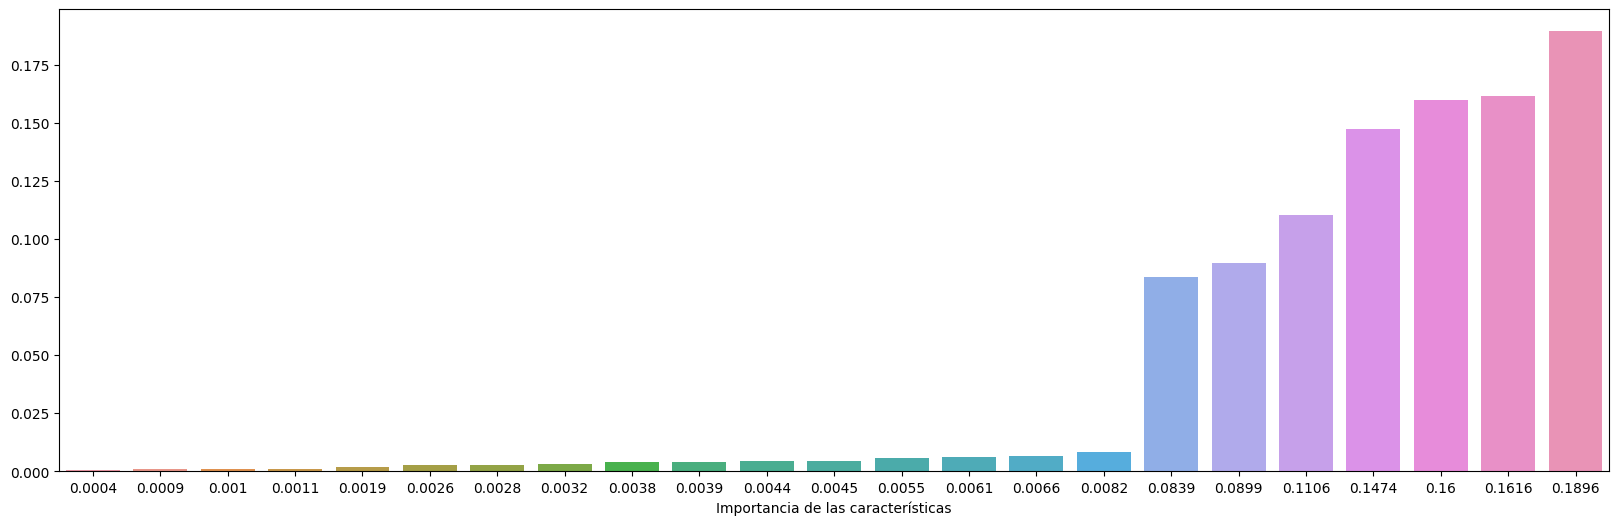

In [ ]:
plt.figure(figsize=(20, 6))
sn.barplot(x=round(featI, 4), y=featI)
plt.xlabel('Importancia de las características')
plt.show()

### KNN

In [ ]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

err = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance',algorithm='kd_tree')
    knn.fit(X_train, y_train)
    y_pred_i = knn.predict(X_test)
    err.append(np.mean(y_pred_i != y_test))

Text(0, 0.5, 'Mean Error')

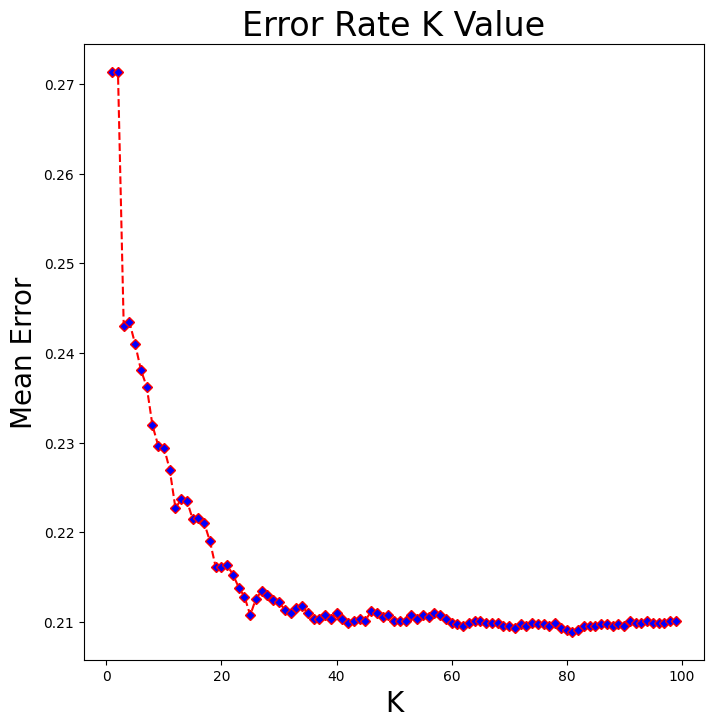

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot()

ax.plot(range(1, 100), err, color='red', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=5)
ax.set_title('Error Rate K Value',fontsize=24)
ax.set_xlabel('K',fontsize=20)
ax.set_ylabel('Mean Error',fontsize=20)

In [ ]:
k_optimo = np.where(err==np.min(err))[0][0]+1
print('Mejor k =',k_optimo)

Mejor k = 81


In [ ]:
best_classifier = KNeighborsClassifier(n_neighbors=k_optimo, weights='distance',algorithm='kd_tree')
best_classifier.fit(X_train, y_train)
y_best_pred = best_classifier.predict(X_test)
print('Menor error medio con k=%i : %.3f' % (k_optimo,np.mean(y_best_pred != y_test)*100),'%')

Menor error medio con k=81 : 20.888 %


In [ ]:
knn = KNeighborsClassifier(n_neighbors=81)  #valor de n_neighbors
knn.fit(X_train, np.ravel(y_train))
y_pred_knn = knn.predict(X_test)
print_performances('K-Nearest Neighbors Classifier', knn, X_train, y_train, X_test, y_test)

K-Nearest Neighbors Classifier
 - Train accuracy: 78.7%
 - Test accuracy: 79.4%

Test               precision    recall  f1-score   support

           0       0.72      0.96      0.82      2432
           1       0.94      0.63      0.75      2432

    accuracy                           0.79      4864
   macro avg       0.83      0.79      0.79      4864
weighted avg       0.83      0.79      0.79      4864



In [ ]:
predicciones = rfc.predict(X)

# Crear un nuevo DataFrame con las predicciones
df_riesgo_cred_empresas = pd.DataFrame({
    'Empresa': df_empresas.loc[X.index, 'Company name'],
    'Riesgo crediticio': predicciones
})

In [ ]:
conteo_valores = df_riesgo_cred_empresas['Riesgo crediticio'].value_counts()
print(conteo_valores)

0    12319
1    12001
Name: Riesgo crediticio, dtype: int64


In [ ]:
df_riesgo_cred_empresas.head(20)

,Empresa,Riesgo crediticio
0,LENDLEASE S.R.L.,1
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,1
2,EVISO S.P.A.,0
3,CASA SERVICE MACHINE,1
4,PANFERTIL SPA,0
5,SFEIR,1
6,SODIRE,1
7,MALLINCKRODT DAR S.R.L.,0
8,VAL D'OCA S.R.L.,0
9,JINGOLD S.P.A.,1
